In [8]:
import geopandas as gpd
import pandas as pd

In [2]:
from shapely.geometry import LineString, Point

In [17]:
gdf = gpd.read_file("./동작구 한강.shp")
line = gdf.geometry.iloc[0]
line_length = line.length

In [18]:
line_length

4239.595796746362

In [19]:
ratio = line_length / 4290
points = []

In [20]:
csv_df = pd.read_csv("./ㅁㅁㅁ.csv")

In [21]:
accumulated_distances = csv_df["구간누적거리"].tolist()

In [22]:
points = [gdf.interpolate(distance * ratio) for distance in accumulated_distances]

In [28]:
# 점들을 GeoDataFrame으로 변환
points_gdf = gpd.GeoDataFrame(geometry=points)

In [26]:
for p in points:
    print(type(p))
points = [line.interpolate(distance * ratio) for distance in accumulated_distances]


<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>


In [29]:
points_gdf = gpd.GeoDataFrame({"geometry": gpd.GeoSeries(points)})


In [31]:
# 구간누적거리 컬럼 추가
points_gdf["구간누적거리"] = accumulated_distances

# 결과 출력
print(points_gdf)

                         geometry  구간누적거리
0   POINT (195716.595 446329.432)       0
1   POINT (195921.946 446261.166)     219
2   POINT (196313.913 446106.103)     648
3   POINT (196334.778 446094.826)     672
4   POINT (196793.024 445843.264)    1201
5   POINT (197166.609 445641.205)    1631
6   POINT (197638.263 445413.434)    2161
7   POINT (198139.406 445335.381)    2677
8   POINT (198323.276 445353.922)    2864
9   POINT (198675.954 445392.328)    3223
10  POINT (199107.465 445524.120)    3683
11  POINT (199478.084 445795.194)    4152
12  POINT (199564.311 445900.854)    4290


In [32]:
# '구간누적거리' 컬럼을 기준으로 조인 수행
merged_gdf = points_gdf.merge(csv_df, on='구간누적거리', how='inner')


In [41]:
merged_gdf.to_file("output_shapefile.shp")


C:\Users\82106\AppData\Local\Temp\ipykernel_28964\2489752207.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file("output_shapefile.shp")


SchemaError: Failed to create field name '구간누적거리': cannot convert to ISO-8859-1

In [38]:
print(gdf.crs)
merged_gdf.crs = "EPSG:5174"
print(merged_gdf.crs)

EPSG:5174
EPSG:5174


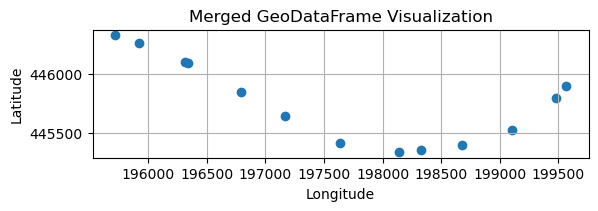

In [39]:
import matplotlib.pyplot as plt

merged_gdf.plot()
plt.title('Merged GeoDataFrame Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [40]:
merged_gdf

,geometry,구간누적거리,no.,측점번호,구간거리,누가거리,최심하상고,평형하상고,계획홍수량((㎥/s),계획홍수위(EL.m),하폭(현재),하폭(계획),20년,30년,50년,80년,100년,150년,200년,비고
0,POINT (195716.595 446329.432),0,108,39932,343,39589,-2.69,-2.52,37000,15.19,1123,1123,-,12.30,12.97,13.55,13.82,-,14.65,한강철교
1,POINT (195921.946 446261.166),219,109,40151,219,39932,-4.30,-4.61,37000,15.24,1048,1048,-,12.37,13.04,13.62,13.89,-,14.71,NaN
2,POINT (196313.913 446106.103),648,110,40580,429,40151,-8.25,-8.23,37000,15.33,851,851,-,12.42,13.09,13.67,13.94,-,14.77,한강대교
3,POINT (196334.778 446094.826),672,111,40604,24,40580,-3.99,-6.98,37000,15.33,1070,1070,-,12.48,13.16,13.75,14.03,-,14.87,NaN
4,POINT (196793.024 445843.264),1201,112,41133,529,40604,-3.43,-3.47,37000,15.44,1028,1028,-,12.60,13.29,13.88,14.16,-,15.00,NaN
5,POINT (197166.609 445641.205),1631,113,41563,430,41133,-7.30,-7.31,37000,15.53,1126,1126,-,12.67,13.37,13.97,14.25,-,15.10,NaN
6,POINT (197638.263 445413.434),2161,114,42093,530,41563,-7.00,-7.00,37000,15.64,1196,1196,-,12.77,13.47,14.07,14.35,-,15.22,NaN
7,POINT (198139.406 445335.381),2677,115,42609,516,42093,-8.71,-8.68,37000,15.74,1295,1295,-,12.83,13.54,14.14,14.43,-,15.30,반포천(좌)
8,POINT (198323.276 445353.922),2864,116,42796,187,42609,-4.03,-3.99,37000,15.78,1321,1321,-,12.84,13.55,14.16,14.44,-,15.31,동작대교
9,POINT (198675.954 445392.328),3223,117,43155,359,42796,-4.45,-4.46,37000,15.88,1209,1209,-,12.89,13.59,14.20,14.49,-,15.36,NaN


In [44]:
column_mapping = {
    "no.": "no",
    "측점번호": "measurement_point_no",
    "구간거리": "segment_distance",
    "누가거리": "cumulative_distance",
    "최심하상고": "max_water_level",
    "평형하상고": "equilibrium_water_level",
    "계획홍수량((㎥/s)": "planned_flood_volume_cubic_mps",
    "계획홍수위(EL.m)": "planned_flood_level_el_m",
    "하폭(현재)": "current_width",
    "하폭(계획)": "planned_width",
    "구간누적거리": "segment_cumulative_distance",
    "20년": "20_years",
    "30년": "30_years",
    "50년": "50_years",
    "80년": "80_years",
    "100년": "100_years",
    "150년": "150_years",
    "200년": "200_years",
    "비고": "remarks"
}

merged_gdf = merged_gdf.rename(columns=column_mapping)


In [45]:
merged_gdf.to_file("output_shapefile.shp")

C:\Users\82106\AppData\Local\Temp\ipykernel_28964\3311622792.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_gdf.to_file("output_shapefile.shp")


In [53]:
# CSV 파일 불러오기
df = pd.read_csv("./동작구 지하철역.csv", encoding = "CP949")

# Point 기하학적 객체 생성
geometry = [Point(xy) for xy in zip(df['x'], df['y'])]

# GeoDataFrame으로 변환
gdf_subway = gpd.GeoDataFrame(df, geometry=geometry)

# 좌표계 설정
gdf_subway.crs = "EPSG:4326"

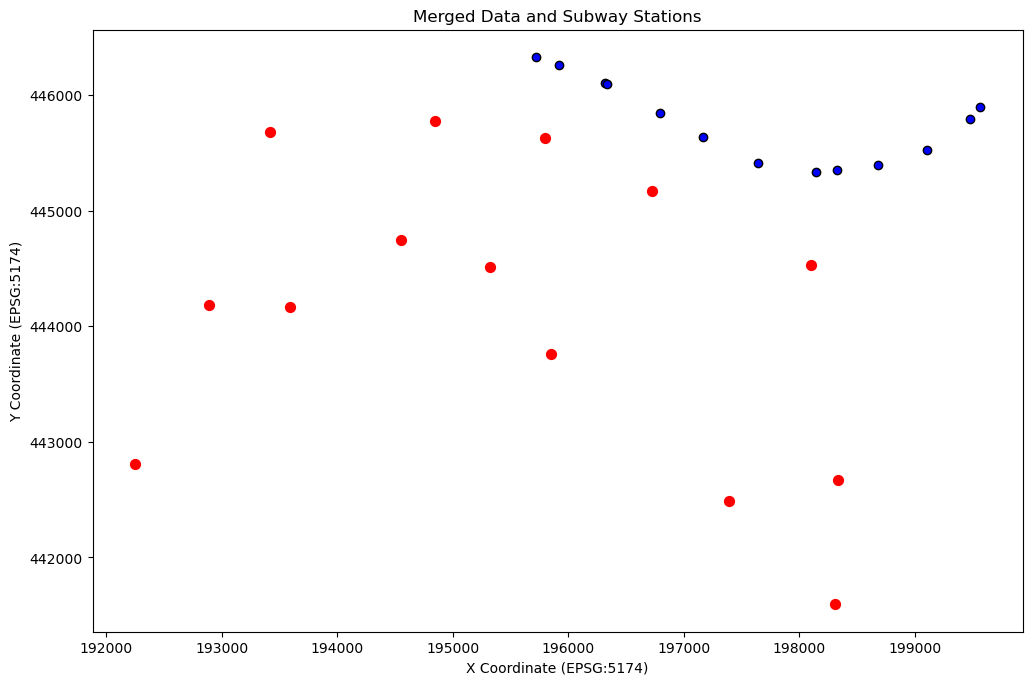

In [59]:
import matplotlib.pyplot as plt

# gdf_subway 좌표계 변환
gdf_subway_transformed = gdf_subway.to_crs(epsg=5174)

# Plot 설정
fig, ax = plt.subplots(figsize=(12, 12))

# merged_gdf 그리기
merged_gdf.plot(ax=ax, color='blue', edgecolor='k', linewidth=1)

# gdf_subway_transformed 그리기
gdf_subway_transformed.plot(ax=ax, color='red', markersize=50)

# 제목과 축 이름 설정
ax.set_title("Merged Data and Subway Stations")
ax.set_xlabel("X Coordinate (EPSG:5174)")
ax.set_ylabel("Y Coordinate (EPSG:5174)")

# Show the plot
plt.show()


In [66]:
import numpy as np

# gdf_subway를 merged_gdf의 좌표계로 변환
gdf_subway_transformed = gdf_subway.to_crs(merged_gdf.crs)

# 가장 가까운 점 찾기
def nearest(point, gdf):
    # 각 점까지의 거리 계산
    distances = gdf.geometry.distance(point)
    # 가장 가까운 점의 인덱스 반환
    return distances.idxmin()

# 각 지하철역에 대한 가장 가까운 merged_gdf의 인덱스 찾기
nearest_indices = gdf_subway_transformed.geometry.apply(lambda x: nearest(x, merged_gdf))

# 가장 가까운 점의 'planned_flood_level_el_m' 값을 참조하여 '계획홍수위' 컬럼 생성
gdf_subway_transformed['flood'] = nearest_indices.map(merged_gdf['planned_flood_level_el_m'])

# 좌표계를 원래대로 복원하고 파일로 저장
gdf_subway_transformed.to_crs(epsg=4326).to_file("./subway_with_flood_level.shp", encoding='utf-8')

gdf_subway_transformed


,역이름,y,x,geometry,flood
0,노량진,37.514219,126.942454,POINT (194842.694 445778.629),15.19
1,상도,37.502834,126.947910,POINT (195324.336 444514.741),15.24
2,숭실대입구,37.496029,126.953822,POINT (195846.709 443759.186),15.44
3,장승배기,37.504898,126.939150,POINT (194549.904 444744.297),15.19
4,신대방삼거리,37.499701,126.928276,POINT (193587.971 444168.185),15.19
5,노들,37.512887,126.953222,POINT (195794.610 445630.250),15.24
6,흑석,37.508770,126.963708,POINT (196721.504 445172.887),15.53
7,동작,37.502971,126.979306,POINT (198100.462 444528.828),15.74
8,사당,37.476530,126.981685,POINT (198310.202 441594.154),15.74
9,총신대입구(이수),37.486263,126.981989,POINT (198337.316 442674.390),15.74


In [67]:
gdf_subway_transformed.drop(columns=['geometry']).to_csv("./subway_with_flood_level.csv", encoding='utf-8-sig', index=False)
